## Libraries

[Pandas](https://python-graph-gallery.com/pandas/) is a popular open-source Python library used for data manipulation and analysis. It provides data structures and functions that make working with structured data, such as tabular data (like `Excel` spreadsheets or `SQL` tables), easy and intuitive.

To install [Pandas](https://python-graph-gallery.com/pandas/), you can use the **following command** in your command-line interface (such as `Terminal` or `Command Prompt`):

`pip install pandas`

[Matplotlib](https://python-graph-gallery.com/matplotlib/) functionalities have been **integrated into the pandas** library, facilitating their use with `dataframes` and `series`. For this reason, you might also need to **import the [matplotlib](https://python-graph-gallery.com/matplotlib/) library** when building charts with [Pandas](https://python-graph-gallery.com/pandas/).

This also means that they use the **same functions**, and if you already know [Matplotlib](https://python-graph-gallery.com/matplotlib/), you'll have no trouble learning plots with [Pandas](https://python-graph-gallery.com/pandas/).

In [1]:
import pandas as pd
import random, numpy as np # used for data generation
import matplotlib.pyplot as plt

## Line chart with multiple variables

### Dataset

In order to create graphics with [Pandas](https://python-graph-gallery.com/pandas/), we need to use **pandas objects**: `Dataframes` and `Series`. A dataframe can be seen as an `Excel` table, and a series as a `column` in that table. This means that we must **systematically** convert our data into a format used by pandas.

Since [line charts](https://python-graph-gallery.com/line-chart/) need quantitative variables, we will create a dataset with temperature, pressure and humidity, **evolving through time**.

In [2]:
# Define the number of time points
num_time_points = 100

# Generate time values
time_values = np.arange(num_time_points)

# Generate random data for three variables (e.g., temperature, pressure, and humidity)
temperature = np.random.uniform(200, 400, num_time_points)  # Random temperature values between 20 and 30
pressure = np.random.uniform(500, 700, num_time_points)  # Random pressure values between 900 and 1100
humidity = np.random.uniform(800, 1000, num_time_points)  # Random humidity values between 30 and 70

data = {
    'Time': time_values,
    'Temperature': temperature,
    'Pressure': pressure,
    'Humidity': humidity
}
df = pd.DataFrame(data)

### Create the plot

Once we've opened our dataset, we'll now **create the graph**. The following displays the **evolution** of our variables using the `plot()` function, and since we want the evolution of **every variable** in our pandas dataframe, we juste have to specify **which variable** will be in the `x-axis`, which is `'Time'`.

Also, keep in mind that the `kind='line'` argument is **facultative** (you can remove it!) since it's the default value when calling the `plot()` function.

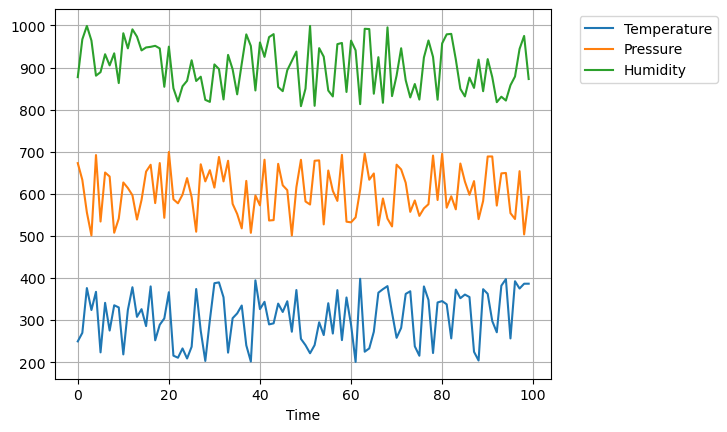

In [3]:
# Define the size of the figure
plt.figsize=(8, 6)

# Create and display the linechart
df.plot(x='Time',
        kind='line', # (facultative) Default argument
        grid=True, # Add a grid in the background
        )
plt.legend(loc='upper right',
           bbox_to_anchor=(1.35, 1), # Shift the legend outside the chart (35% on the right)
          )
plt.show()

## Line chart with multiple groups

### Dataset

Now let's say we want to display the evolution of temperature only and for different rows. For this, we create a new dataset:

- random temperature data is generated using `np.random.uniform()`. This function creates random numbers within a specified range.
- `country_labels` is created using `np.repeat()`. It repeats the country names in the countries array so that each country name is associated with its **corresponding temperature** data points.
- `time_values` is generated using `np.tile()` and `np.arange()`. It creates a **sequence of numbers** from 0 to 19 (for the 20 data points per country) and then repeats this sequence for each country

In [4]:
# Define the number of data points
num_data_points_per_country = 20

# Generate random temperature data for each country
france_temperatures = np.random.uniform(10, 20, num_data_points_per_country)  # Temperature range for France (10-20 degrees)
germany_temperatures = np.random.uniform(0, 10, num_data_points_per_country)   # Temperature range for Germany (0-10 degrees)
italy_temperatures = np.random.uniform(25, 30, num_data_points_per_country)    # Temperature range for Italy (25-30 degrees)

# Create an array of country labels corresponding to the data points
countries = ['France', 'Germany', 'Italy']
country_labels = np.repeat(countries, num_data_points_per_country)

# Generate time values
time_values = np.tile(np.arange(num_data_points_per_country), len(countries))

# Create a Pandas DataFrame
data = {
    'Country': country_labels,
    'Temperature': np.concatenate([france_temperatures, germany_temperatures, italy_temperatures]),
    'Time': time_values
}

df = pd.DataFrame(data)

### Create the plot

We begin by **grouping the data by country**, then creates a figure and axis for plotting. For each country, we plot the temperature against time as **separate lines** on the same graph, adds **labels**, a **title**, a legend for country identification, and a grid for clarity.

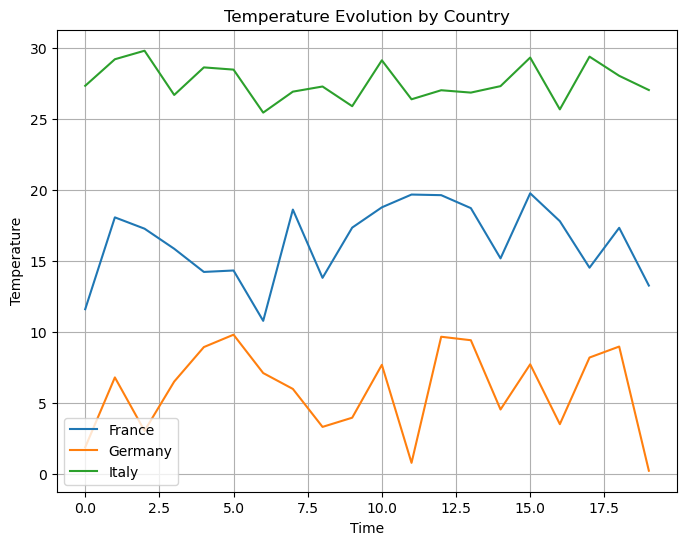

In [5]:
# Group the data by continent and calculate the average life expectancy for each year
df_country = df.groupby(['Country'])

# Create a figure and axis object using the object-oriented approach
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each group as a separate line
for key, group in df_country:
    ax.plot(group['Time'], group['Temperature'], label=key)

# Set axis labels and title
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Temperature Evolution by Country')

# Add a legend
ax.legend()

# Display the grid
ax.grid(True)

# Show the plot
plt.show()

## Going further

This post explains how to create a line chart with mutliple variables and groups, with [pandas](https://python-graph-gallery.com/pandas/).

For more examples of **how to create or customize** your line charts, see the [line charts section](https://python-graph-gallery.com/line-chart/). You may also be interested in how to [customize a line chart](https://python-graph-gallery.com/line-chart/531-customizing-linecharts-with-pandas) with pandas.